In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd
from scipy import stats

In [2]:
boston_dataset=load_boston()

In [3]:
boston_df=pd.DataFrame(boston_dataset.data)

In [4]:
boston_df.columns=boston_dataset.feature_names


In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df.shape

(506, 13)

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


# Find outliers by plotting boxplot

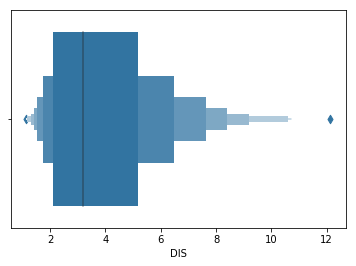

In [9]:
sns.boxenplot(boston_df["DIS"])

Outliers are in range of 10 and 12

# Find outlier using scatter plot

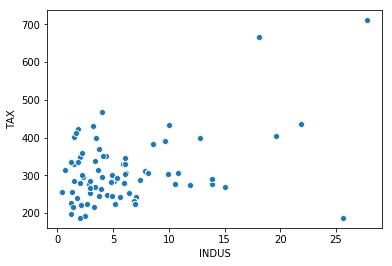

In [10]:
sns.scatterplot(x=boston_df["INDUS"],y=boston_df["TAX"])

Most of the values are saturated in lower part of scatterplot

# Find outliers using z score

In [11]:
z_score=np.abs(stats.zscore(boston_df))

In [12]:
#All values where z score is greater than 3 in dataset
print(z_score[z_score>3])

[3.37503876 3.16044092 3.80423444 3.13442533 3.04975214 3.66839786
 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786
 3.5896366  3.5896366  3.053142   3.053142   3.5896366  3.5896366
 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786
 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786 3.47668804
 3.66839786 3.66839786 3.37503876 3.44677021 3.01082466 3.66839786
 3.66839786 3.66839786 3.66839786 3.66839786 3.66839786 3.37503876
 3.66839786 3.37503876 3.16044092 3.28729991 3.28729991 3.37503876
 3.96051769 3.22806892 3.22806892 3.66839786 3.66839786 3.66839786
 3.66839786 3.66839786 3.55504427 3.88024936 3.45000244 3.66839786
 3.66839786 3.66839786 3.1002147  3.0582213  3.54877081 9.9339306
 4.04260552 4.41236983 7.48364564 3.0582213  5.53032093 3.88219457
 3.52640114 3.59503802 3.04414519 4.90310412 3.40999876 3.61192313
 3.67420069 8.13688351 3.7303382  3.37947874 3.88307172 3.87068199
 3.82649563 3.64043047 3.96231963 3.70435268 3.24494606 3.018970

In [13]:
#Getting location of these values in numpy array
np.where(z_score>3)

#it give 2 tuple containing row and columns of values where z_score is greater than 3

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [14]:
z_score[55][1]

3.375038763517309

In [15]:
boston_df_o=boston_df[(z_score<3).all(axis=1)]

In [41]:
boston_df_o.shape

(415, 13)

In [17]:
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# interquartile range (IQR)

In [29]:
q1=boston_df.quantile(0.25)
q3=boston_df.quantile(0.75)

In [31]:
q1

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64

In [32]:
q3

CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
Name: 0.75, dtype: float64

In [33]:
iqr=q3-q1

In [34]:
iqr

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [46]:
boston_df_o=boston_df_o[~((boston_df_o<(q1-1.5*iqr))|(boston_df_o>(q3+1.5*iqr)))]

In [49]:
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
